In [7]:
import TurbPy as tb
from TurbPy.imports import *
deck = 'KH_200ppc_200wci/'
# deck = 'KH_beta0.1/'
# deck = 'turb2/'

dirs = '/pscratch/sd/g/goodwill/' + deck
figs = '/pscratch/sd/g/goodwill/Fig/' + deck
info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)
twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))
lx_de = info['Lx/de']
ly_de = info['Ly/de']
lx_di = info['Lx/di']
ly_di = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])
lxr_di = np.linspace(0, lx_di, nx)
lyr_di = np.linspace(0, ly_di, ny)
lxr_de = np.linspace(0, lx_de, nx)
lyr_de = np.linspace(0, ly_de, ny)
dx = lx_de/nx
dy = ly_de/ny


In [8]:
# import TurbPy as tb
# from TurbPy.imports import *

# # deck = 'KH_Lv1di/'
# # deck = 'KH_new/'
# # deck = 'KH_400ppc_200wci2/'
# deck = 'KH_200ppc_200wci/'
# # deck = 'KH_beta0.1/'
# # deck = 'turb2/'

# dirs = '/pscratch/sd/g/goodwill/' + deck
# figs = '/pscratch/sd/g/goodwill/Fig/' + deck
# info = tb.get_vpic_info(dirs)
# times = tb.get_times(dirs)
# en_out = tb.read_energies(dirs)
# twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
# twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))
# lx_de = info['Lx/de']
# ly_de = info['Ly/de']
# lx_di = info['Lx/di']
# ly_di = info['Ly/di']
# nx = int(info['nx'])
# ny = int(info['ny'])
# lxr_di = np.linspace(0, lx_di, nx)
# lyr_di = np.linspace(0, ly_di, ny)
# lxr_de = np.linspace(0, lx_de, nx)
# lyr_de = np.linspace(0, ly_de, ny)
# dx = lx_de/nx
# dy = ly_de/ny

# tsnap = [363, 505, 650, 1000]
# x = 0
# y = 0
# fig, ax = plt.subplots(4,2, figsize = (10, 10), sharex = 'col', layout = 'tight')
# # print(ax.shape)
# for t in tsnap:
#   print(twci[t])
#   f = tb.load_field_fil(dirs, times[t])
#   el = tb.load_hydro_fil(dirs, times[t], 'electron')
#   ion = tb.load_hydro_fil(dirs, times[t], 'ion')

#   j = np.sqrt((el['jx'] + ion['jx'])**2 + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2)
#   jrms = np.sqrt(np.mean(j**2))
#   jnrm = j/jrms

#   QDe = tb.QD_calc(dirs, t, sp = 'electron')
#   QDi = tb.QD_calc(dirs, t, sp = 'ion')

#   QJe, QJi, QJ = tb.QJ_calc(dirs, t)

#   Qwe = tb.Qw_calc(dirs, t, sp = 'electron')
#   Qwi = tb.Qw_calc(dirs, t, sp = 'ion')

#   df = pd.DataFrame()
#   emask = np.linspace(0, 5, 50)
#   Jie, JeE, JE = tb.JE_calc(dirs, times[t])
#   pthe, pide = tb.ps_calc(dirs, times[t], 'electron')
#   pthi, pidi = tb.ps_calc(dirs, times[t], 'ion')
#   Qe_row = []
#   tsize = 14
#   for fn in emask:  
#     QDe_thres = np.where(QDe > fn)
#     QJe_thres = np.where(QJ > fn)
#     Qwe_thres = np.where(Qwe > fn)
#     # JE_QDe =   np.average(JE[QDe_thres])
#     pidi_QDe = np.average(pidi[QDe_thres])
#     pide_QDe = np.average(pide[QDe_thres])
#     pide_Qwe = np.average(pide[Qwe_thres])
#     pidi_QJe = np.average(pidi[QJe_thres])
#     pide_QJe = np.average(pide[QJe_thres])
#     QJe_cnt = len(QJe_thres[0])
#     Qe_row.append({
#       'QJe': QJe_cnt, 
#       'pide_Qwe': pide_Qwe,
#       'pide_QDe': pide_QDe, 
#       'pidi_QDe': pidi_QDe, 
#       'pide_QJe': pide_QJe, 
#       # 'pidi_QJe': pidi_QJe
#       })
#   # df =pd.DataFrame(row)
#   Qi_row = []
#   imask = np.linspace(0.1, 1, 50)
#   for ifn in imask:  
#     QDi_thres = np.where(QDi > ifn)
#     QJi_thres = np.where(QJ > ifn)
#     Qwi_thres = np.where(Qwi > ifn)
#     # JE_QDi =   np.average(JE[QDi_thres])
#     pidi_QDi = np.average(pidi[QDi_thres])
#     pidi_Qwi = np.average(pidi[Qwi_thres])
#     pide_QDi = np.average(pide[QDi_thres])
#     pidi_QJi = np.average(pidi[QJi_thres])
#     # pide_QJi = np.average(pide[QJi_thres])
#     QJi_cnt = len(QJi_thres[0])
#     Qi_row.append({
#       'QJi': QJi_cnt, 
#       'pide_QDi': pide_QDi, 
#       'pidi_Qwi': pidi_Qwi,
#       'pidi_QDi': pidi_QDi,
#       # 'pide_QJi': pide_QJi, 
#       'pidi_QJi': pidi_QJi
#       })
#   Qe_cond = pd.DataFrame(Qe_row)
#   Qi_cond = pd.DataFrame(Qi_row)
#   df = pd.concat([Qe_cond, Qi_cond], axis = 1, join = 'inner')
#   # print(df)
#   # ax.semilogy(mask, df['QD']/df['QD'][0], marker = 's', color = 'green', label = 'Area', markersize = 2)
#   # ax[x,y].plot(emask, df['JE_QDe'], marker = '^', color = 'blue', label = r'$\langle J \cdot E | Q_D^e\rangle$', markersize = 4)
#   ax[x,y].plot(emask, df['pide_QDe'], marker = 'o', color = 'purple', label = r'$\langle PiD^e | Q_D^e\rangle$', markersize = 4)
#   ax[x,y].plot(emask, df['pide_QJe'], marker = 'x', color = 'violet', label = r'$\langle PiD^e | Q_J\rangle$', markersize = 4)
#   ax[x,y].plot(emask, df['pide_Qwe'], marker = 's', color = 'indigo', label = r'$\langle PiD^e | Q_\omega^e\rangle$', markersize = 4)
#   ax[x,y].plot(emask, df['pidi_QDe'], color = 'red', label = r'$\langle PiD^i | Q_D^e\rangle$', markersize = 4)
#   ax[x,y].grid(which = 'both')
#   # ax[x,y].text(1, 4,  r'$t \omega_{ci} = $'f'{np.round(twci[t],2)}')
#   ax[x,y].legend('', title = r'$t \omega_{ci} = $'f'{np.round(twci[t],2)}', title_fontsize = tsize, frameon = False, loc = 'upper left')
#   ax[x,y].set_ylim(-1e-6, 1.5e-5)
#   y = 1
#   # ax[x,y].plot(imask, df['JE_QDi'], marker = '^', color = 'red', label = r'$\langle J \cdot E | Q_D^i\rangle$', markersize = 4)
#   ax[x,y].plot(imask, df['pidi_QDi'], marker = 'o', color = 'maroon', label = r'$\langle PiD^i | Q_D^i\rangle$', markersize = 4)
#   ax[x,y].plot(imask, df['pidi_QJi'], marker = 'x', color = 'salmon', label = r'$\langle PiD^i | Q_J\rangle$', markersize = 4)
#   ax[x,y].plot(imask, df['pidi_Qwi'], marker = 's', color = 'red', label = r'$\langle PiD^i | Q_\omega^i\rangle$', markersize = 4)
#   ax[x,y].plot(imask, df['pide_QDi'], color = 'purple', label = r'$\langle PiD^e | Q_D^i\rangle$', markersize = 4)
#   ax[x,y].legend('', frameon = False, loc = 'upper left')
#   ax[x,y].grid(which = 'both')
#   ax[x,y].set_ylim(-2.5e-7, 1.2e-6)
#   x = x + 1
#   y = 0
# ax[0,0].legend(loc = 'upper left', fontsize = 13, ncols = 2, title = r'$t \omega_{ci} = $'f'{np.round(twci[tsnap[0]],2)}', title_fontsize = tsize, frameon = False)
# ax[0,1].legend(loc = 'upper left', fontsize = 13, ncols = 2, frameon = False)

# # ax[0,0].set_ylim(-5e-7, 5e-6)
# # ax[0,1].set_ylim(-2e-7, 1.2e-6)
# # ax[0,1].set_ylim(-1e-7, 2e-6)
# # ax[2,0].set_ylim(-3e-6, 2e-6)

# ax[-1,0].set_xlabel(r'$Q_{D,J, \omega}^e$', fontsize = 18)
# ax[-1,1].set_xlabel(r'$Q_{D,J, \omega}^i$', fontsize = 18)

# fig.savefig(figs + 'Q_condAv.png', dpi = 200)
# fig.clf()

In [9]:
tsnap = [510, 1124]

QDe = tb.QD_calc(dirs, tsnap[0], sp = 'electron')
QDi = tb.QD_calc(dirs, tsnap[0], sp = 'ion')

QJe, QJi, QJ = tb.QJ_calc(dirs, tsnap[0])

Qwe = tb.Qw_calc(dirs, tsnap[0], sp = 'electron')
Qwi = tb.Qw_calc(dirs, tsnap[0], sp = 'ion')

(1078, 2560)


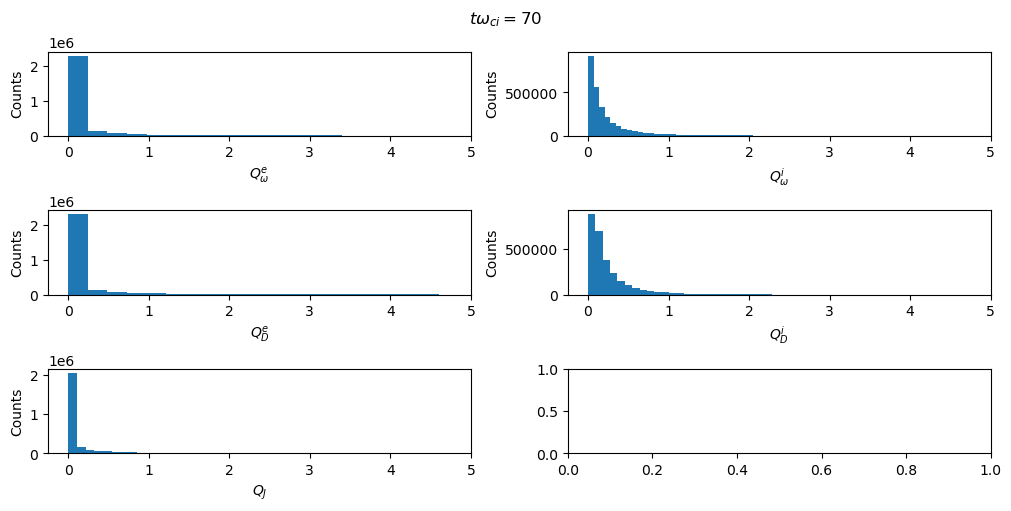

In [10]:

fig, ax = plt.subplots(3, 2, figsize = (10,5), layout = 'constrained')
ax[0,0].hist(Qwe.flatten(), bins = 100)
ax[0,0].set_xlabel(r'$Q_\omega^e$')
ax[0,0].set_ylabel(r'Counts')
ax[0,0].set_xlim(-0.25, 5)

ax[0,1].hist(Qwi.flatten(), bins = 100)
ax[0,1].set_xlabel(r'$Q_\omega^i$')
ax[0,1].set_ylabel(r'Counts')
ax[0,1].set_xlim(-0.25, 5)

ax[1,0].hist(QDe.flatten(), bins = 100)
ax[1,0].set_xlabel(r'$Q_D^e$')
ax[1,0].set_ylabel(r'Counts')
ax[1,0].set_xlim(-0.25, 5)

ax[1,1].hist(QDi.flatten(), bins = 100)
ax[1,1].set_xlabel(r'$Q_D^i$')
ax[1,1].set_ylabel(r'Counts')
ax[1,1].set_xlim(-0.25, 5)

ax[2,0].hist(QJ.flatten(), bins = 100)
ax[2,0].set_xlabel(r'$Q_J$')
ax[2,0].set_ylabel(r'Counts')
ax[2,0].set_xlim(-0.25, 5)

fig.suptitle(r'$t \omega_{ci} =$'f'{int(twci[tsnap[0]])}')
fig.savefig(figs + 'Qhist_'f'{int(tsnap[0])}''.png')

In [11]:
tsnap = [510, 1124]

QDe = tb.QD_calc(dirs, tsnap[1], sp = 'electron')
QDi = tb.QD_calc(dirs, tsnap[1], sp = 'ion')

QJe, QJi, QJ = tb.QJ_calc(dirs, tsnap[1])

Qwe = tb.Qw_calc(dirs, tsnap[1], sp = 'electron')
Qwi = tb.Qw_calc(dirs, tsnap[1], sp = 'ion')

(1078, 2560)


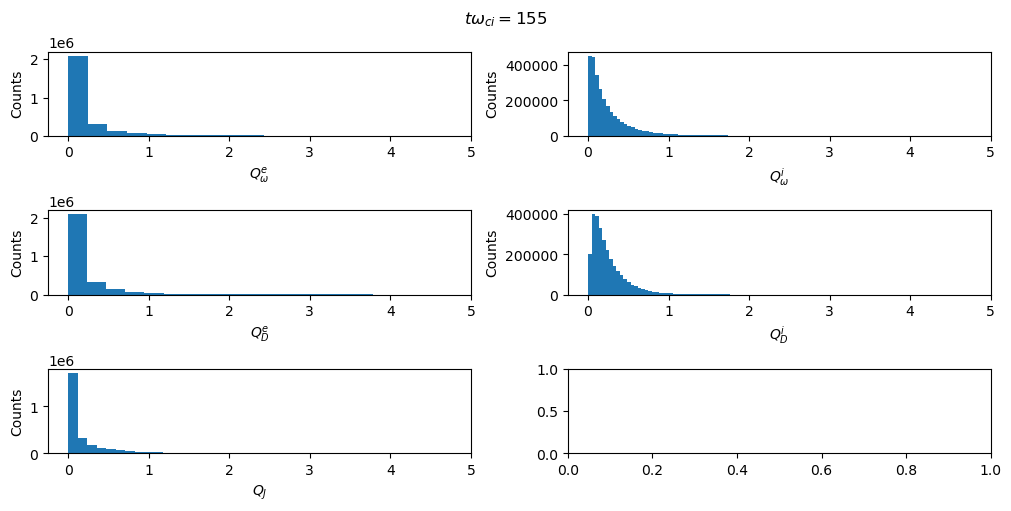

In [12]:

fig, ax = plt.subplots(3, 2, figsize = (10,5), layout = 'constrained')
ax[0,0].hist(Qwe.flatten(), bins = 100)
ax[0,0].set_xlabel(r'$Q_\omega^e$')
ax[0,0].set_ylabel(r'Counts')
ax[0,0].set_xlim(-0.25, 5)

ax[0,1].hist(Qwi.flatten(), bins = 100)
ax[0,1].set_xlabel(r'$Q_\omega^i$')
ax[0,1].set_ylabel(r'Counts')
ax[0,1].set_xlim(-0.25, 5)

ax[1,0].hist(QDe.flatten(), bins = 100)
ax[1,0].set_xlabel(r'$Q_D^e$')
ax[1,0].set_ylabel(r'Counts')
ax[1,0].set_xlim(-0.25, 5)

ax[1,1].hist(QDi.flatten(), bins = 100)
ax[1,1].set_xlabel(r'$Q_D^i$')
ax[1,1].set_ylabel(r'Counts')
ax[1,1].set_xlim(-0.25, 5)

ax[2,0].hist(QJ.flatten(), bins = 100)
ax[2,0].set_xlabel(r'$Q_J$')
ax[2,0].set_ylabel(r'Counts')
ax[2,0].set_xlim(-0.25, 5)

fig.suptitle(r'$t \omega_{ci} =$'f'{int(twci[tsnap[1]])}')
fig.savefig(figs + 'Qhist_'f'{int(tsnap[1])}''.png')